# Lab 9: Document Analysis

In this assignment, we will learn how to do document classification and clustering



## 1. Example

In this example, we use [20newsgroups](https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset) dataset. Each sample is a document and there are totally 20 classes.

### 1.1 Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

data_train = fetch_20newsgroups(
    subset='train', remove=('headers', 'footers', 'quotes'))
data_test = fetch_20newsgroups(
    subset='test', remove=('headers', 'footers', 'quotes'))

print("Train data target labels: {}".format(data_train.target))
print("Train data target names: {}".format(data_train.target_names))

print('#training samples: {}'.format(len(data_train.data)))
print('#testing samples: {}'.format(len(data_test.data)))

Train data target labels: [7 4 4 ... 3 1 8]
Train data target names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
#training samples: 11314
#testing samples: 7532


### 1.2 Represent documents with TF-IDF represention

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler


# TF-IDF representation for each document
vectorizer = TfidfVectorizer()
data_train_vectors = vectorizer.fit_transform(data_train.data)
data_test_vectors = vectorizer.transform(data_test.data)

print(data_train_vectors.shape, data_test_vectors.shape)

(11314, 101631) (7532, 101631)


### 1.3 Use KNN to do document classification

Here, we use the cross-validation method to select $K$.

In [3]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score


Xtr = data_train_vectors
Ytr = data_train.target

Xte = data_test_vectors
Yte = data_test.target

k_range = range(1, 5)
param_grid = dict(n_neighbors=k_range)

clf_knn = KNeighborsClassifier(n_neighbors=1)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(Xtr, Ytr)

print(grid.best_score_)
print(grid.best_params_)

0.16855203045338205
{'n_neighbors': 1}
CPU times: user 41min 9s, sys: 28.6 s, total: 41min 38s
Wall time: 7min 6s


### 1.3 Use Logistic Regression to do document classification
Here, we also use the cross-validation method to select the regularization coefficient.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

# =====training with cross validation======
coeff = range(1, 10)
param_grid = dict(C=coeff)

clf_lr = LogisticRegression(penalty='l2')

grid = GridSearchCV(clf_lr, param_grid, cv=5, scoring='accuracy')
grid.fit(Xtr, Ytr)

print(grid.best_params_)

# =====testing======
clf_lr = LogisticRegression(penalty='l2', C=grid.best_params_['C'])
clf_lr.fit(Xtr, Ytr)

y_pred = clf_lr.predict(Xte)

acc = accuracy_score(Yte, y_pred)
macro_f1 = f1_score(Yte, y_pred, average='macro')
micro_f1 = f1_score(Yte, y_pred, average='micro')

print(acc, macro_f1, micro_f1)

/Users/fuadhassan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/fuadhassan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

{'C': 9}
0.6841476367498672 0.6746130862400499 0.6841476367498672


/Users/fuadhassan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 2. Task: Document Classification and Clustering

In this task, we are going to use [BBCNews](BBC_News_Train.csv) dataset. There are 1490 articles from 5 topics, including tech, business, sport, entertainment, politics.

* Task 1: Please use KNN and logistic regression to do classification, and compare their performance.

* Task 2: Please use K-means to partition this dataset into 5 clusters and find the representative words in each cluster.

### 2.1 Load data and represent it with TF-IDF representation

In [5]:
import pandas as pd
# Read the data
BBCNews = pd.read_csv(
    'https://raw.githubusercontent.com/fuadh246/CIS-3715/main/Lab09_DocumentAnalysis/BBC_News_Train.csv')
BBCNews

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


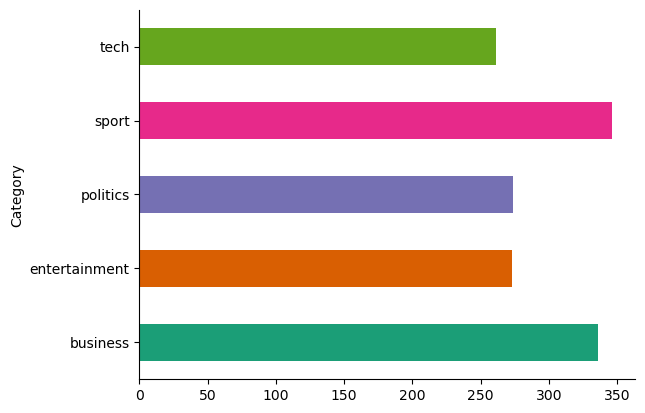

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
BBCNews.groupby('Category').size().plot(
    kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
LE = LabelEncoder()
LE.fit(BBCNews['Category'].values)
BBCNews['Category'] = LE.transform(BBCNews['Category'].values)

In [9]:
BBCNews['Category'].unique()

array([0, 4, 2, 3, 1])

In [10]:
TFID_V = TfidfVectorizer(strip_accents='ascii',
                         lowercase=True,
                         stop_words='english')

In [11]:
TF_IDF_rep = TFID_V.fit_transform(BBCNews['Text'].values)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(TF_IDF_rep,
                                                    BBCNews['Category'].values,
                                                    test_size=0.20,
                                                    random_state=12)

### 2.2 Use KNN to do document classification

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, classification_report

param_grid = {
    'n_neighbors': [1, 5, 10, 15, 20]
}
model_KNN = KNeighborsClassifier()
grid_search = GridSearchCV(
    model_KNN, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_

In [14]:
grid_search.best_score_

0.9480046411870188

In [15]:
best_estimator = grid_search.best_estimator_

In [16]:
y_pred_KNN = best_estimator.predict(X_test)

In [17]:
print(classification_report(y_true=y_test, y_pred=y_pred_KNN))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        69
           1       0.96      0.92      0.94        48
           2       0.89      0.98      0.93        50
           3       0.99      1.00      0.99        73
           4       0.96      0.95      0.96        58

    accuracy                           0.95       298
   macro avg       0.95      0.95      0.95       298
weighted avg       0.95      0.95      0.95       298



### 2.3 Use Logistic Regression to do document classification

In [18]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [1, 3, 5, 6, 9, 11],
    'penalty': ['l2']
}
model_log = LogisticRegression()
grid_search = GridSearchCV(model_log, param_grid,
                           cv=5, scoring='accuracy', error_score='raise')
grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_
print(best_param)

{'C': 3, 'penalty': 'l2'}


In [19]:
grid_search.best_score_

0.9681516121092788

In [20]:
best_estimator = grid_search.best_estimator_
y_pred_log = best_estimator.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        69
           1       0.98      0.98      0.98        48
           2       0.94      0.92      0.93        50
           3       1.00      1.00      1.00        73
           4       1.00      0.97      0.98        58

    accuracy                           0.97       298
   macro avg       0.97      0.96      0.97       298
weighted avg       0.97      0.97      0.97       298



### 2.4 Use K-means to do document clustering and find the 10 most representative words in each cluster.

In [22]:
from sklearn.cluster import KMeans

Kmeans_model = KMeans(n_clusters=5, random_state=42)
Kmeans_model.fit(TF_IDF_rep)

/Users/fuadhassan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [23]:
Kmeans_model.algorithm

'lloyd'

In [24]:
Kmeans_model.cluster_centers_

array([[0.00000000e+00, 6.96351756e-03, 0.00000000e+00, ...,
        0.00000000e+00, 5.84947180e-04, 0.00000000e+00],
       [2.45310873e-05, 1.21174285e-02, 1.13059990e-04, ...,
        1.63342969e-04, 0.00000000e+00, 0.00000000e+00],
       [1.57105487e-04, 3.01485206e-03, 0.00000000e+00, ...,
        1.29424146e-03, 0.00000000e+00, 8.53789162e-04],
       [3.18036590e-04, 1.46961916e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.12768855e-04, 1.01889882e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [25]:
Kmeans_model.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2', 'kmeans3', 'kmeans4'],
      dtype=object)

In [26]:
centroids = Kmeans_model.cluster_centers_

word_bag = TFID_V.get_feature_names_out()

for ind, center in enumerate(centroids):
    top_10_words_ind = np.argpartition(center, -10)[-10:]
    top_10_words = word_bag[top_10_words_ind]

    print(f'Cluster:{ind}\n{top_10_words}\n\n')

Cluster:0
['star' 'oscar' 'films' 'award' 'best' 'band' 'festival' 'awards' 'actor'
 'film']


Cluster:1
['sales' 'market' 'bank' 'company' 'government' 'economy' 'mr' 'said'
 'year' 'growth']


Cluster:2
['season' 'players' 'match' 'team' 'said' 'game' 'chelsea' 'win' 'england'
 'cup']


Cluster:3
['minister' 'brown' 'government' 'howard' 'said' 'party' 'labour' 'mr'
 'election' 'blair']


Cluster:4
['technology' 'microsoft' 'people' 'mobile' 'said' 'phone' 'users'
 'digital' 'software' 'music']


